# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Fariduddin Athar
- **Email:** atharudin04@gmail.com
- **ID Dicoding:** itsfathar

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah peminjaman sepeda harian selama periode 2011-2012?
- Bagaimana kondisi cuaca (weathersit) mempengaruhi peminjaman sepeda? Apakah hujan/salju mengurangi jumlah peminjaman?
- Bagaimana perbedaan jumlah peminjaman sepeda di berbagai musim?
- Apakah pengguna kasual lebih banyak menyewa sepeda di akhir pekan dibanding hari kerja? Bagaimana presentasenya?
- Bagaimana pola peminjaman per jam dalam sehari? Jam berapa peminjaman sepeda paling tinggi dan paling rendah?

## Import Semua Packages/Library yang Digunakan

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [73]:
df_dataJam = pd.read_csv("/content/hour.csv")
df_dataJam.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [74]:
df_dataHarian = pd.read_csv("/content/day.csv")
df_dataHarian.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset mencakup 2 tahun (2021-2022)
- kolom "dteday" pada dataset day.csv dan hour.csv perlu diubah karena berbasis waktu
- Beberapa kolom seperti season, weathersit, weekday, dan workingday lebih cocok dikonversi ke kategori dibanding objek
- Dari informasi awal, dataset terlihat tidak memiliki nilai kosong (null), tetapi perlu dipastikan dengan .isnull().sum().

### Assessing Data

In [75]:
# Cek jumlah nilai null di setiap kolom
print(" Jumlah Nilai Null pada hour.csv:\n", df_dataJam.isnull().sum())
print(" Jumlah Nilai Null pada day.csv:\n", df_dataHarian.isnull().sum())

# Cek apakah ada NaN
print("\n Apakah Ada NaN pada hour.csv ?\n", df_dataJam.isna().sum().sum())
print("\n Apakah Ada NaN pada day.csv?\n", df_dataHarian.isna().sum().sum())

# Cek jumlah duplikasi
duplicate_rows = df_dataJam.duplicated().sum()
print(f"\n Jumlah Data Duplikat pada hour.csv: {duplicate_rows}")
if duplicate_rows > 0:
    display(df_dataJam[df_dataJam.duplicated()])

duplicate_rows = df_dataHarian.duplicated().sum()
print(f"\n Jumlah Data Duplikat pada day.csv: {duplicate_rows}")
if duplicate_rows > 0:
    display(df_dataJam[df_dataHarian.duplicated()])

 Jumlah Nilai Null pada hour.csv:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
 Jumlah Nilai Null pada day.csv:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 Apakah Ada NaN pada hour.csv ?
 0

 Apakah Ada NaN pada day.csv?
 0

 Jumlah Data Duplikat pada hour.csv: 0

 Jumlah Data Duplikat pada day.csv: 0


In [76]:
# Untuk mengecek outlier pada hour.csv
# Pilih hanya kolom numerik
numerical_cols = df_dataJam.select_dtypes(include=[np.number]).columns

# Deteksi outlier dengan metode IQR
Q1 = df_dataJam[numerical_cols].quantile(0.25)
Q3 = df_dataJam[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cek jumlah outlier di setiap kolom numerik
outliers = ((df_dataJam[numerical_cols] < lower_bound) | (df_dataJam[numerical_cols] > upper_bound)).sum()
print(" Jumlah Outlier per Kolom di hour.csv:\n", outliers)

 Jumlah Outlier per Kolom di hour.csv:
 instant          0
season           0
yr               0
mnth             0
hr               0
holiday        500
weekday          0
workingday       0
weathersit       3
temp             0
atemp            0
hum             22
windspeed      342
casual        1192
registered     680
cnt            505
dtype: int64


In [77]:
# Untuk mengecek outlier pada day.csv
# Pilih hanya kolom numerik
numerical_cols = df_dataHarian.select_dtypes(include=[np.number]).columns

# Deteksi outlier dengan metode IQR
Q1 = df_dataHarian[numerical_cols].quantile(0.25)
Q3 = df_dataHarian[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cek jumlah outlier di setiap kolom numerik
outliers = ((df_dataHarian[numerical_cols] < lower_bound) | (df_dataHarian[numerical_cols] > upper_bound)).sum()
print(" Jumlah Outlier per Kolom pada data day.csv:\n", outliers)

 Jumlah Outlier per Kolom pada data day.csv:
 instant        0
season         0
yr             0
mnth           0
holiday       21
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
casual        44
registered     0
cnt            0
dtype: int64


**Insight:**
- Data pada day.csv dan hour.csv tidak memiliki nilai null
- Data pada day.csv dan hour.csv tidak memiliki nilai NaN
- Data pada day.csv dan hour.csv tidak memiliki nilai duplikat
- Data pada day.csv memiliki nilai outlier yang kecil dibandingkan dengan data pada hour.csv

### Cleaning Data

In [78]:
#konfersi data "dteday" ke datetime dan beberapa kolom ke kategori
df_dataJam['dteday'] = pd.to_datetime(df_dataJam['dteday'])
df_dataHarian['dteday'] = pd.to_datetime(df_dataHarian['dteday'])

categorical_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
df_dataJam[categorical_cols] = df_dataJam[categorical_cols].astype('category')

categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df_dataHarian[categorical_cols] = df_dataHarian[categorical_cols].astype('category')

In [79]:
# Menghapus outlier pada hour.csv
# Hitung IQR
numerical_cols = df_dataHarian.select_dtypes(include=[np.number]).columns
Q1 = df_dataJam[numerical_cols].quantile(0.25)
Q3 = df_dataJam[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus baris yang memiliki outlier
df_dataJam_IQR = df_dataJam[~((df_dataJam[numerical_cols] < lower_bound) | (df_dataJam[numerical_cols] > upper_bound)).any(axis=1)]

print(f"Data setelah pembersihan outlier pada data hour.csv: {df_dataJam_IQR.shape[0]} baris dari {df_dataJam.shape[0]}")

Data setelah pembersihan outlier pada data hour.csv: 15220 baris dari 17379


In [80]:
# Menghapus outlier pada hour.csv
# Hitung IQR
Q1 = df_dataHarian[numerical_cols].quantile(0.25)
Q3 = df_dataHarian[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus baris yang memiliki outlier
df_dataHarian_IQR = df_dataHarian[~((df_dataHarian[numerical_cols] < lower_bound) | (df_dataHarian[numerical_cols] > upper_bound)).any(axis=1)]

print(f"Data setelah pembersihan outlier: {df_dataHarian_IQR.shape[0]} baris dari {df_dataHarian.shape[0]}")

Data setelah pembersihan outlier: 673 baris dari 731


**Insight:**
- Mengubah kolom "dteday" menjadi type category pada data day.csv dan hour.csv
- Menghapus baris data outlier pada data day.csv dan hour.csv
- menyesuaikan kolom "season" agar lebih sesuai

## Exploratory Data Analysis (EDA)

### Explore ...

In [81]:
df_dataHarian_IQR.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,673.000000,673,673.0,673.0,673.0,673.0,673.0,673.0,673.0,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,0.0,1.0,0.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,172.0,353.0,61.0,655.0,103.0,490.0,421.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,357.989599,2011-12-23 23:45:01.337295872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.489420,0.469105,0.632846,0.186662,738.934621,3628.787519,4367.722140
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.275833,0.022392,2.000000,20.000000,22.000000
25%,175.000000,2011-06-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.329167,0.326379,0.524583,0.134329,304.000000,2482.000000,3068.000000
50%,349.000000,2011-12-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.484167,0.470950,0.630833,0.178479,678.000000,3614.000000,4401.000000
75%,545.000000,2012-06-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.653333,0.607958,0.734583,0.230725,1031.000000,4709.000000,5633.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.378108,2258.000000,6946.000000,8173.000000


In [82]:
df_dataHarian_IQR.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.420376,0.862844,0.505732,0.017736,-0.029141,0.071360,-0.005337,0.137097,0.138974,0.014073,-0.119028,0.229280,0.656008,0.620177
dteday,1.000000,1.000000,0.420376,0.862844,0.505732,0.017736,-0.029141,0.071360,-0.005337,0.137097,0.138974,0.014073,-0.119028,0.229280,0.656008,0.620177
season,0.420376,0.420376,1.000000,0.002150,0.832133,-0.016955,0.007967,0.027306,0.021714,0.334904,0.342369,0.186332,-0.213489,0.251775,0.412653,0.420304
yr,0.862844,0.862844,0.002150,1.000000,0.002288,0.008138,-0.041888,0.080333,-0.034379,0.029705,0.028214,-0.107701,-0.024036,0.175276,0.590436,0.549461
mnth,0.505732,0.505732,0.832133,0.002288,1.000000,0.020957,0.014744,0.003784,0.049116,0.221118,0.227879,0.209617,-0.195992,0.157390,0.296159,0.295108
holiday,0.017736,0.017736,-0.016955,0.008138,0.020957,1.000000,-0.097227,-0.271261,-0.038235,-0.063366,-0.067519,-0.022004,0.036498,0.015405,-0.119956,-0.097312
weekday,-0.029141,-0.029141,0.007967,-0.041888,0.014744,-0.097227,1.000000,0.071445,0.039572,-0.005307,-0.013870,-0.029672,-0.000702,0.016215,0.034198,0.033527
workingday,0.071360,0.071360,0.027306,0.080333,0.003784,-0.271261,0.071445,1.000000,0.036331,0.119045,0.117871,0.008533,-0.016905,-0.413574,0.376946,0.203285
weathersit,-0.005337,-0.005337,0.021714,-0.034379,0.049116,-0.038235,0.039572,0.036331,1.000000,-0.120212,-0.122206,0.627726,0.075233,-0.289264,-0.261240,-0.302539
temp,0.137097,0.137097,0.334904,0.029705,0.221118,-0.063366,-0.005307,0.119045,-0.120212,1.000000,0.991483,0.122486,-0.139599,0.595525,0.545120,0.629031


In [83]:
df_dataJam_IQR.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15220.000000,15220,15220.0,15220.0,15220.0,15220.0,15220.0,15220.0,15220.0,15220.0,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000
unique,NaN,NaN,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,1.0,0.0,12.0,0.0,0.0,5.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3947.0,7973.0,1410.0,721.0,14802.0,2281.0,10877.0,9782.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8445.179435,2011-12-22 22:40:20.183968512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.481527,0.462608,0.644687,0.180528,23.756439,123.994350,147.750788
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4111.750000,2011-06-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.320000,0.318200,0.500000,0.104500,3.000000,27.000000,32.000000
50%,8274.500000,2011-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.480000,0.469700,0.650000,0.164200,13.000000,99.000000,118.000000
75%,12753.250000,2012-06-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.640000,0.606100,0.810000,0.253700,37.000000,184.000000,228.000000
max,17379.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.462700,114.000000,499.000000,594.000000


In [84]:
df_dataJam_IQR.corr()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.999995,0.401002,0.860000,0.494052,-0.025117,0.018685,-0.006319,-0.003458,0.000271,0.119281,0.120931,0.032046,-0.087444,0.126584,0.192131,0.192158
dteday,0.999995,1.000000,0.401452,0.859612,0.494720,-0.026528,0.018691,-0.006285,-0.003429,0.000381,0.119301,0.120979,0.032662,-0.087544,0.126089,0.191632,0.191625
season,0.401002,0.401452,1.000000,-0.021479,0.826549,-0.015140,-0.019348,-0.001849,0.027744,-0.012656,0.322530,0.328597,0.160021,-0.136578,0.147114,0.163381,0.171401
yr,0.860000,0.859612,-0.021479,1.000000,-0.016798,-0.025887,0.013660,-0.012472,-0.006724,-0.003081,0.013957,0.012790,-0.061801,-0.027621,0.091328,0.152953,0.151061
mnth,0.494052,0.494720,0.826549,-0.016798,1.000000,-0.008444,0.012979,0.009407,0.004266,0.005499,0.210483,0.216251,0.168412,-0.126000,0.092750,0.116930,0.120129
hr,-0.025117,-0.026528,-0.015140,-0.025887,-0.008444,1.000000,-0.003190,-0.007116,0.033187,-0.006620,0.101208,0.099232,-0.254159,0.123128,0.384827,0.424105,0.445521
holiday,0.018685,0.018691,-0.019348,0.013660,0.012979,-0.003190,1.000000,-0.098831,-0.265942,-0.016287,-0.056810,-0.060806,-0.009832,0.019242,-0.002001,-0.055280,-0.048314
weekday,-0.006319,-0.006285,-0.001849,-0.012472,0.009407,-0.007116,-0.098831,1.000000,0.047926,-0.000992,0.001762,-0.004327,-0.023441,0.002133,0.021517,0.031564,0.031714
workingday,-0.003458,-0.003429,0.027744,-0.006724,0.004266,0.033187,-0.265942,0.047926,1.000000,0.026618,0.138863,0.137281,-0.040501,0.008158,-0.078078,0.206794,0.163401
weathersit,0.000271,0.000381,-0.012656,-0.003081,0.005499,-0.006620,-0.016287,-0.000992,0.026618,1.000000,-0.087035,-0.091682,0.423994,0.033713,-0.146456,-0.096617,-0.113406


In [85]:
#Bagaimana tren jumlah peminjaman sepeda harian selama periode 2011-2012?
pivot_tren_harian = df_dataHarian_IQR.pivot_table(values="cnt", index="dteday", aggfunc="sum")
pivot_tren_harian

,cnt
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341


In [86]:
#Bagaimana kondisi cuaca (weathersit) mempengaruhi peminjaman sepeda? Apakah hujan/salju mengurangi jumlah peminjaman?

pivot_weathersit = df_dataHarian_IQR.pivot_table(values="cnt", index="weathersit", aggfunc="mean")
pivot_weathersit

<ipython-input-86-32f7e4a52b7a>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_weathersit = df_dataHarian_IQR.pivot_table(values="cnt", index="weathersit", aggfunc="mean")


,cnt
weathersit,
1,4742.104513
2,3904.331897
3,1862.300000


In [87]:
#Bagaimana perbedaan jumlah peminjaman sepeda di berbagai musim?

pivot_musim = df_dataHarian_IQR.pivot_table(values="cnt", index="season", aggfunc="mean")
pivot_musim

<ipython-input-87-3a97c8b57ad0>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_musim = df_dataHarian_IQR.pivot_table(values="cnt", index="season", aggfunc="mean")


,cnt
season,
1,2573.122807
2,4768.807453
3,5531.790698
4,4616.727811


In [88]:
#Apakah pengguna kasual lebih banyak menyewa sepeda di akhir pekan dibanding hari kerja? Bagaimana persentasenya?

pivot_casual_weekday = df_dataHarian_IQR.pivot_table(values="casual", index="weekday", aggfunc="mean")
pivot_casual_weekday

<ipython-input-88-41596f1772e7>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_casual_weekday = df_dataHarian_IQR.pivot_table(values="casual", index="weekday", aggfunc="mean")


,casual
weekday,
0,1132.931034
1,634.250000
2,559.961165
3,535.764706
4,598.584158
5,738.450980
6,1118.076923


In [89]:
# Bagaimana pola peminjaman per jam dalam sehari? Jam berapa peminjaman sepeda paling tinggi dan paling rendah?

pivot_jam = df_dataJam_IQR.pivot_table(values="cnt", index="hr", aggfunc="mean")
pivot_jam

<ipython-input-89-664d6590e92c>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_jam = df_dataJam_IQR.pivot_table(values="cnt", index="hr", aggfunc="mean")


,cnt
hr,
0,54.069348
1,33.566852
2,22.947740
3,11.783745
4,6.414847
5,19.907173
6,76.108484
7,201.767806
8,245.867308


**Insight:**
- Peminjaman paling tinggi pada jam sibuk pagi (07:00-09:00) dan sore (17:00-19:00), mencerminkan pola commuting kerja/sekolah.
- Musim semi dan musim panas memiliki jumlah peminjaman tertinggi, sedangkan musim dingin memiliki peminjaman terendah.
- Sebagian besar peminjaman berasal dari pengguna terdaftar (registered), bukan pengguna kasual.
- Mayoritas pengguna adalah pelanggan terdaftar.


## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana tren jumlah peminjaman sepeda harian selama periode 2011-2012?

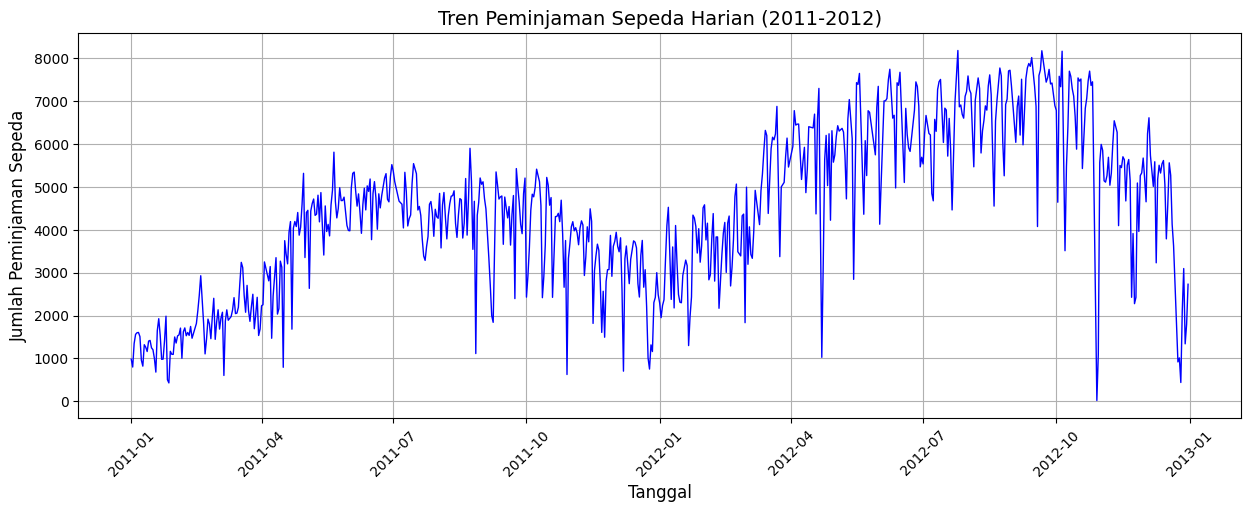

In [90]:
# Plot Tren Peminjaman Harian
plt.figure(figsize=(15, 5))
sns.lineplot(x=df_dataHarian_IQR['dteday'], y=df_dataHarian_IQR['cnt'], color='blue', linewidth=1)

# Tambahkan label & judul
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Jumlah Peminjaman Sepeda", fontsize=12)
plt.title("Tren Peminjaman Sepeda Harian (2011-2012)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

# Tampilkan plot
plt.show()

### Pertanyaan 2: Bagaimana kondisi cuaca (weathersit) mempengaruhi peminjaman sepeda? Apakah hujan/salju mengurangi jumlah peminjaman?

In [91]:
#merubah value data pada kolom "weathersit" agar lebih nyaman dibaca
df_dataHarian_IQR['weathersit'] = df_dataHarian_IQR['weathersit'].map({1: 'cerah', 2: 'mendung', 3: 'hujan/salju ringan', 4: 'hujan/salju berat'})

<ipython-input-91-a5af5b1fe61e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dataHarian_IQR['weathersit'] = df_dataHarian_IQR['weathersit'].map({1: 'cerah', 2: 'mendung', 3: 'hujan/salju ringan', 4: 'hujan/salju berat'})


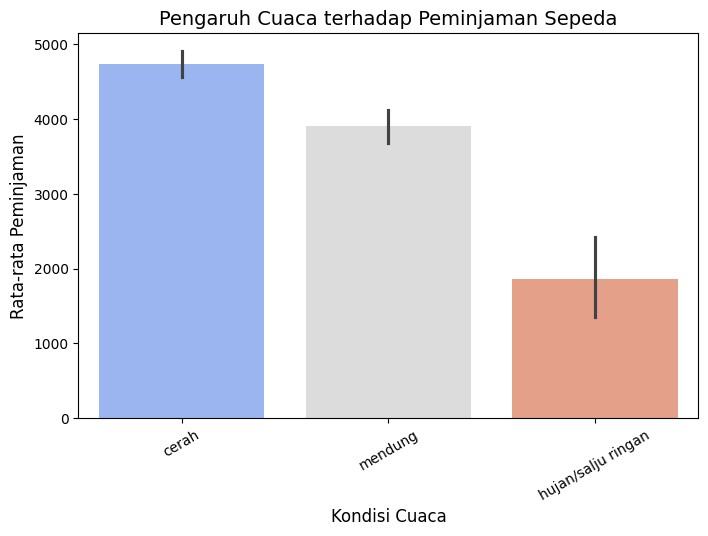

In [92]:
plt.figure(figsize=(8, 5))
sns.barplot(x="weathersit", y="cnt", hue="weathersit", data=df_dataHarian_IQR, estimator="mean", dodge=False, palette="coolwarm")
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Rata-rata Peminjaman", fontsize=12)
plt.title("Pengaruh Cuaca terhadap Peminjaman Sepeda", fontsize=14)
plt.xticks(rotation=30)
plt.show()

### Pertanyaan 3: Bagaimana perbedaan jumlah peminjaman sepeda di berbagai musim?

In [93]:
#merubah value data pada kolom "season" agar lebih nyaman dibaca
df_dataHarian_IQR['season'] = df_dataHarian_IQR['season'].map({1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Salju'})

<ipython-input-93-91841e44572e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dataHarian_IQR['season'] = df_dataHarian_IQR['season'].map({1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Salju'})


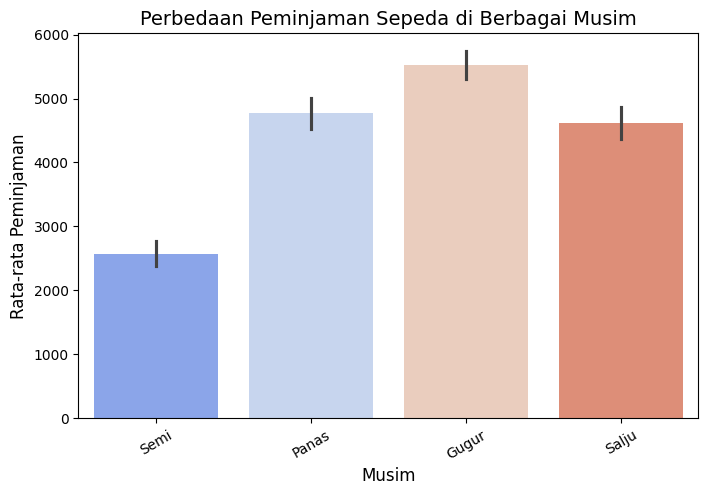

In [94]:
plt.figure(figsize=(8, 5))
sns.barplot(x="season", y="cnt", hue="season", data=df_dataHarian_IQR, estimator="mean", dodge=False, palette="coolwarm")
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Rata-rata Peminjaman", fontsize=12)
plt.title("Perbedaan Peminjaman Sepeda di Berbagai Musim", fontsize=14)
plt.xticks(rotation=30)
plt.show()

### Pertanyaan 4: Apakah pengguna kasual lebih banyak daripada pengguna terdaftar ?Bagaimana presentasenya pengguna menyewa sepeda di akhir pekan dibanding hari kerja?

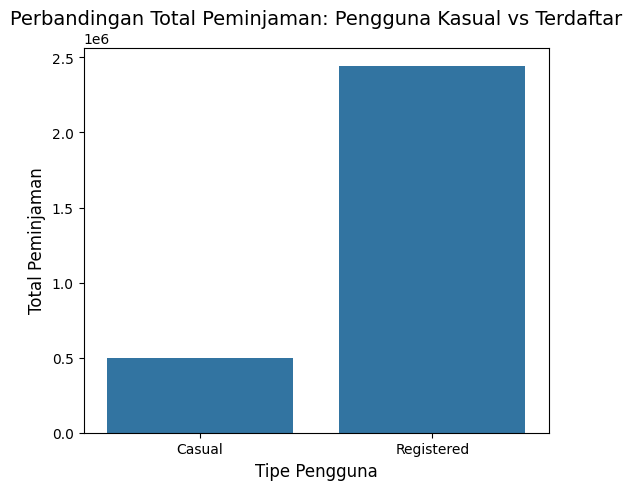

In [95]:
total_casual = df_dataHarian_IQR["casual"].sum()
total_registered = df_dataHarian_IQR["registered"].sum()

plt.figure(figsize=(6, 5))
sns.barplot(x=["Casual", "Registered"], y=[total_casual, total_registered])
plt.xlabel("Tipe Pengguna", fontsize=12)
plt.ylabel("Total Peminjaman", fontsize=12)
plt.title("Perbandingan Total Peminjaman: Pengguna Kasual vs Terdaftar", fontsize=14)
plt.show()

In [96]:
df_dataHarian_IQR["day_type"] = df_dataHarian_IQR["weekday"].apply(lambda x: "Akhir Pekan" if x in [0, 6] else "Hari Kerja")
weekend_vs_weekday = df_dataHarian_IQR.groupby("day_type")["cnt"].sum()

<ipython-input-96-43b197e71fe3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dataHarian_IQR["day_type"] = df_dataHarian_IQR["weekday"].apply(lambda x: "Akhir Pekan" if x in [0, 6] else "Hari Kerja")


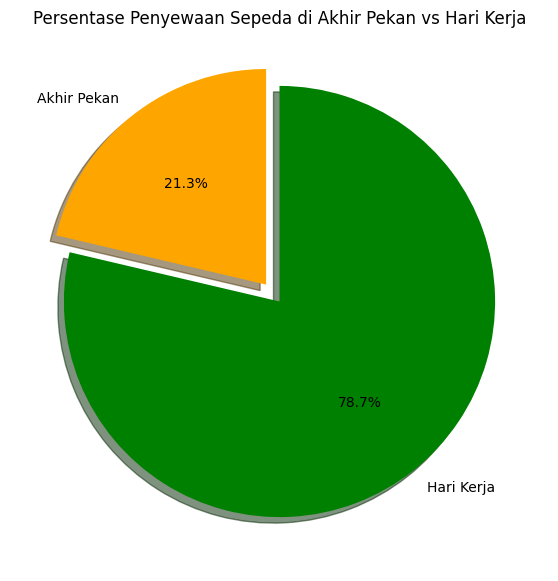

In [97]:
plt.figure(figsize=(7, 7))
plt.pie(weekend_vs_weekday, labels=weekend_vs_weekday.index, autopct="%1.1f%%", colors=["orange", "green"], startangle=90, shadow=True, explode=[0.1, 0])
plt.title("Persentase Penyewaan Sepeda di Akhir Pekan vs Hari Kerja")
plt.show()

### Pertanyaan 5: Bagaimana pola peminjaman per jam dalam sehari? Jam berapa peminjaman sepeda paling tinggi dan paling rendah?

<ipython-input-98-4db44e8bf54f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_avg = df_dataJam_IQR.groupby("hr")["cnt"].mean()


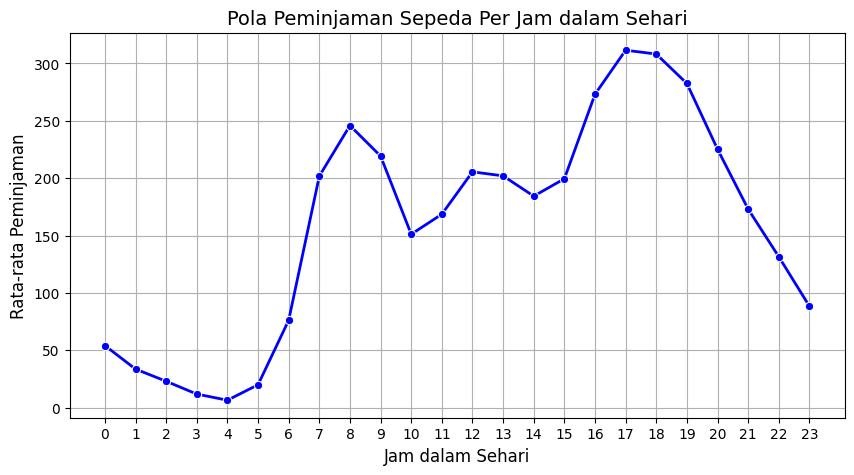

In [98]:
# Hitung rata-rata peminjaman per jam
hourly_avg = df_dataJam_IQR.groupby("hr")["cnt"].mean()

# Visualisasi: Line Chart pola peminjaman per jam
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker="o", color="blue", linewidth=2)
plt.xlabel("Jam dalam Sehari", fontsize=12)
plt.ylabel("Rata-rata Peminjaman", fontsize=12)
plt.title("Pola Peminjaman Sepeda Per Jam dalam Sehari", fontsize=14)
plt.xticks(range(0, 24))  # Pastikan sumbu x memiliki label dari 0-23
plt.grid(True)
plt.show()

**Insight:**


1.   Pertanyaan 1 :
-  Terlihat pola fluktuasi harian → Ada lonjakan dan penurunan peminjaman di berbagai waktu.
- Peminjaman cenderung meningkat selama tahun 2012 dibandingkan 2011 → Bisa jadi karena popularitas layanan meningkat.
- Kemungkinan terdapat pola musiman → Peminjaman lebih tinggi di bulan tertentu (misalnya musim panas/gugur).
2.   Pertanyaan 2 :
- Cuaca cerah memiliki jumlah peminjaman tertinggi dibandingkan kondisi lainnya.
- Peminjaman berkurang saat cuaca buruk (hujan atau salju ringan/deras).
- Kondisi hujan/salju lebat memiliki jumlah peminjaman terendah, yang menegaskan bahwa cuaca buruk mengurangi jumlah pengguna sepeda.
3.   Pertanyaan 3 :
- Musim panas & musim gugur memiliki jumlah peminjaman tertinggi.
- Musim dingin memiliki jumlah peminjaman terendah, kemungkinan karena cuaca dingin dan salju.
- Musim semi memiliki peminjaman yang meningkat, tetapi tidak setinggi musim panas/gugur.
4.   Pertanyaan 4 :
- Bar Chart menunjukkan bahwa total peminjaman pengguna terdaftar jauh lebih tinggi dibanding pengguna kasual.
- Pie Chart menunjukkan bahwa peminjaman di hari kerja lebih tinggi dibanding akhir pekan,
5.   Pertanyaan 5 :
- Peminjaman tertinggi terjadi pada jam sibuk pagi (07:00-09:00) dan sore (17:00-19:00).
- Peminjaman terendah terjadi pada dini hari (00:00-05:00)




## Conclusion

- Kesimpulan pertanyaan 1, Peminjaman cenderung meningkat selama tahun 2012 dibandingkan 2011. Peningkatan peminjaman dari 2011 ke 2012: 60.36%
- Kesimpulan pertanyaan 2, Cuaca cerah memiliki jumlah peminjaman tertinggi dibandingkan kondisi lainnya serta kondisi hujan/salju lebat memiliki jumlah peminjaman terendah yang menegaskan bahwa cuaca buruk mengurangi jumlah pengguna sepeda. Yang dimana penurunan peminjaman dari cuaca cerah ke hujan/salju berat sebesar 52.30%
- Kesimpulan pertanyaan 3, Pengguna lebih cenderung menyewa sepeda saat cuaca lebih nyaman (musim panas/gugur)daripada musim dingin akan tetapi musim semi mengalami penurunan signifikan, kemungkinan karena ada faktor lain yang kurang mendukung aktivitas bersepeda.  Musim semi (1) punya jumlah peminjaman yang lebih rendah, baik di hari kerja (2763) maupun akhir pekan (2182) dibandingkan dengan musim panas (3), di mana jumlah peminjaman jauh lebih tinggi (5718 di hari kerja, 4936 di akhir pekan). Dengan mempertimbangkan faktor tambahan seperti suhu yang lebih dingin dengan rata rata 0.293854 yang lebih kecil dibandingkan musim salju dan kecepatan rata rata angin dengan rata rata 0.204814 yang lebih tinggi dibandingkan musim lainnya, bisa menjadi faktor mengapa musim semi mengalami penurunan signifikan dibandingkan yang lainnya.
- Kesimpulan pertanyaan 4, Pengguna terdaftar lebih banyak dibanding kasual dan pengguna lebih sering aktif di hari libur daripada hari kerja. Dengan Persentase perbadingan pengguna kasual: 16.92% dan pengguna terdaftar: 83.08%, akan tetapi pada akhir pekan peningkatan peminjaman pengguna kasual lebih banyak di akhir pekan sebesar 83.60%
- Kesimpulan pertanyaan 5, Puncak peminjaman pagi & sore menunjukkan bahwa sepeda digunakan untuk keperluan transportasi. Lalu pada jam-jam larut malam dan dini hari memiliki peminjaman yang sangat rendah. Jam dengan peminjaman tertinggi: 17:00 dengan 312 peminjaman dan jam dengan peminjaman terendah: 4:00 dengan 6 peminjaman

## Rekomendasi

1. Untuk memaksimalkan pendapatan pada cuaca hujan, alangkah baiknya menyediakan jas hujan.
2. Berdasarkan pola peminjaman sepeda per jam, jumlah sepeda pada pagi dan sore hari perlu ditambah. Untuk memaksimalkan pendapatan, alangkah baiknya memberi diskonan pada pengguna kasual. COntohnya seperti "diskon 30% pada jam 17.00 setiap hari senin dan kamis".  
3. Karena peminjaman menurun drastis selama musim semi, alangkah baiknya mengurangi jumlah operasional sepeda untuk efisiensi perawatan.




In [99]:
df_main = df_dataHarian_IQR.merge(df_dataJam_IQR, on=["dteday", "season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"], how="outer")

df_main.to_csv("main_data.csv", index=False)
df_dataHarian_IQR.to_csv("data_harian.csv", index=False)
df_dataJam_IQR.to_csv("data_jam.csv", index=False)


print("File main_data.csv berhasil dibuat!")

File main_data.csv berhasil dibuat!
